In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('machine_failure.csv')
data.head()

Date  Temperature  Humidity   Operator  Measure1  Measure2  \
0  1/1/2016 0:00           67        82  Operator1       291         1   
1  1/1/2016 1:00           68        77  Operator1      1180         1   
2  1/1/2016 2:00           64        76  Operator1      1406         1   
3  1/1/2016 3:00           63        80  Operator1       550         1   
4  1/1/2016 4:00           65        81  Operator1      1928         1   

   Measure3  Measure4  Measure5  Measure6  ...  Measure15  \
0         1      1041       846       334  ...       1842   
1         1      1915      1194       637  ...        748   
2         1       511      1577      1121  ...       1689   
3         1      1754      1834      1413  ...        711   
4         2      1326      1082       233  ...        507   

   Hours Since Previous Failure  Failure  ﻿Date.year  ﻿Date.month  \
0                            90       No        2016            1   
1                            91       No        2016            1   
2                            92       No        2016            1   
3                            93       No        2016            1   
4                            94       No        2016            1   

   ﻿Date.day-of-month  ﻿Date.day-of-week  ﻿Date.hour  ﻿Date.minute  \
0                   1                  5           0             0   
1                   1                  5           1             0   
2                   1                  5           2             0   
3                   1                  5           3             0   
4                   1                  5           4             0   

   ﻿Date.second  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 28 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 28 columns):
Date                            8784 non-null object
Temperature                     8784 non-null int64
Humidity                        8784 non-null int64
Operator                        8784 non-null object
Measure1                        8784 non-null int64
Measure2                        8784 non-null int64
Measure3                        8784 non-null int64
Measure4                        8784 non-null int64
Measure5                        8784 non-null int64
Measure6                        8784 non-null int64
Measure7                        8784 non-null int64
Measure8                        8784 non-null int64
Measure9                        8784 non-null int64
Measure10                       8784 non-null int64
Measure11                       8784 non-null int64
Measure12                       8784 non-null int64
Measure13                       8784 non-null int64
Measure

In [4]:
data.Failure.value_counts()

No     8703
Yes      81
Name: Failure, dtype: int64

In [3]:
data.Date = pd.to_datetime(data.Date, yearfirst=True)

In [4]:
data.set_index('Date', inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 27 columns):
Temperature                     8784 non-null int64
Humidity                        8784 non-null int64
Operator                        8784 non-null object
Measure1                        8784 non-null int64
Measure2                        8784 non-null int64
Measure3                        8784 non-null int64
Measure4                        8784 non-null int64
Measure5                        8784 non-null int64
Measure6                        8784 non-null int64
Measure7                        8784 non-null int64
Measure8                        8784 non-null int64
Measure9                        8784 non-null int64
Measure10                       8784 non-null int64
Measure11                       8784 non-null int64
Measure12                       8784 non-null int64
Measure13                       8784 non-null int64
Measure14               

In [5]:
ts_data = data.iloc[:,:20]

In [6]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 20 columns):
Temperature                     8784 non-null int64
Humidity                        8784 non-null int64
Operator                        8784 non-null object
Measure1                        8784 non-null int64
Measure2                        8784 non-null int64
Measure3                        8784 non-null int64
Measure4                        8784 non-null int64
Measure5                        8784 non-null int64
Measure6                        8784 non-null int64
Measure7                        8784 non-null int64
Measure8                        8784 non-null int64
Measure9                        8784 non-null int64
Measure10                       8784 non-null int64
Measure11                       8784 non-null int64
Measure12                       8784 non-null int64
Measure13                       8784 non-null int64
Measure14               

In [7]:
ts_data.to_csv('ts_data.csv')

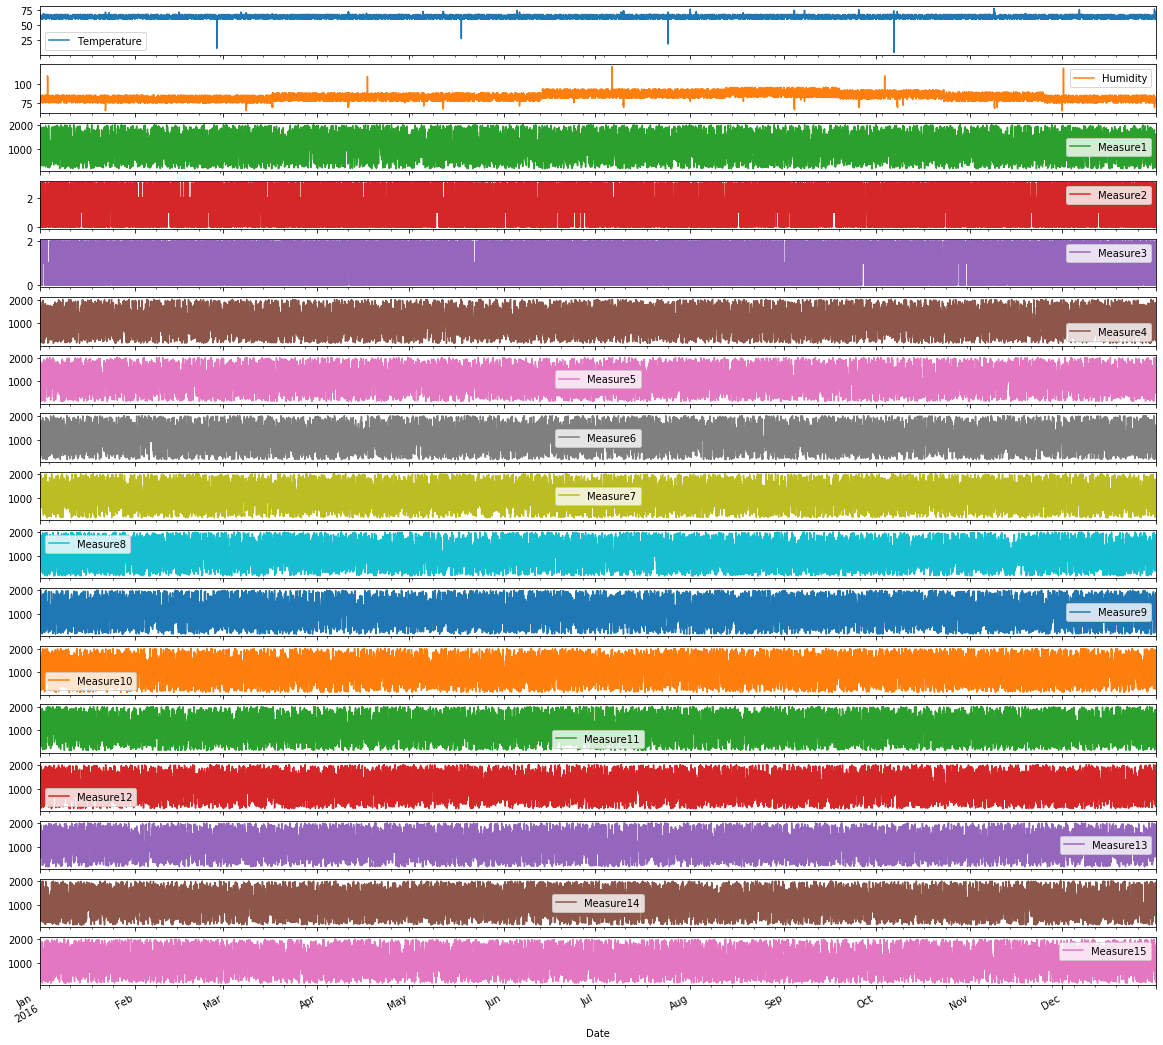

In [11]:

ts_data.plot(figsize=(20,20), subplots=True, layout=(17,1));

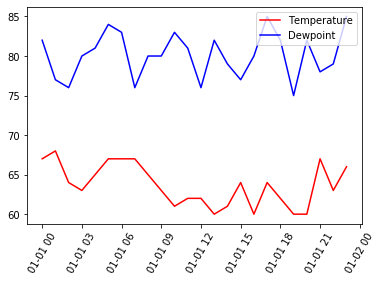

In [15]:
temperature = ts_data.Temperature
humidity = ts_data.Humidity
plt.plot(temperature['2016-01-01'], color='red',label='Temperature')
plt.plot(humidity['2016-01-01'], color='blue',label='Humidity')
plt.legend(loc='upper right')
plt.xticks(rotation=60)
plt.show()


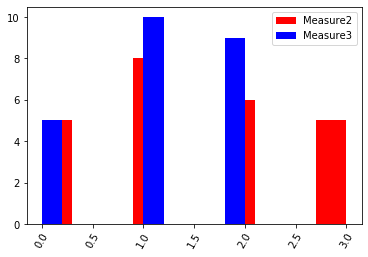

In [51]:
measure2 = ts_data.Measure2
measure3 = ts_data.Measure3
plt.hist(measure2['2016-01-01'], color='red',label='Measure2')
plt.hist(measure3['2016-01-01'], color='blue',label='Measure3')
plt.legend(loc='upper right')
plt.xticks(rotation=60)
plt.show()

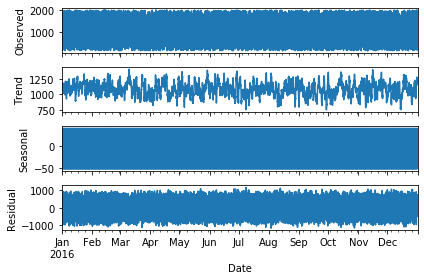

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = ts_data.Measure15
result = seasonal_decompose(series, model='additive')
result.plot()
plt.show()

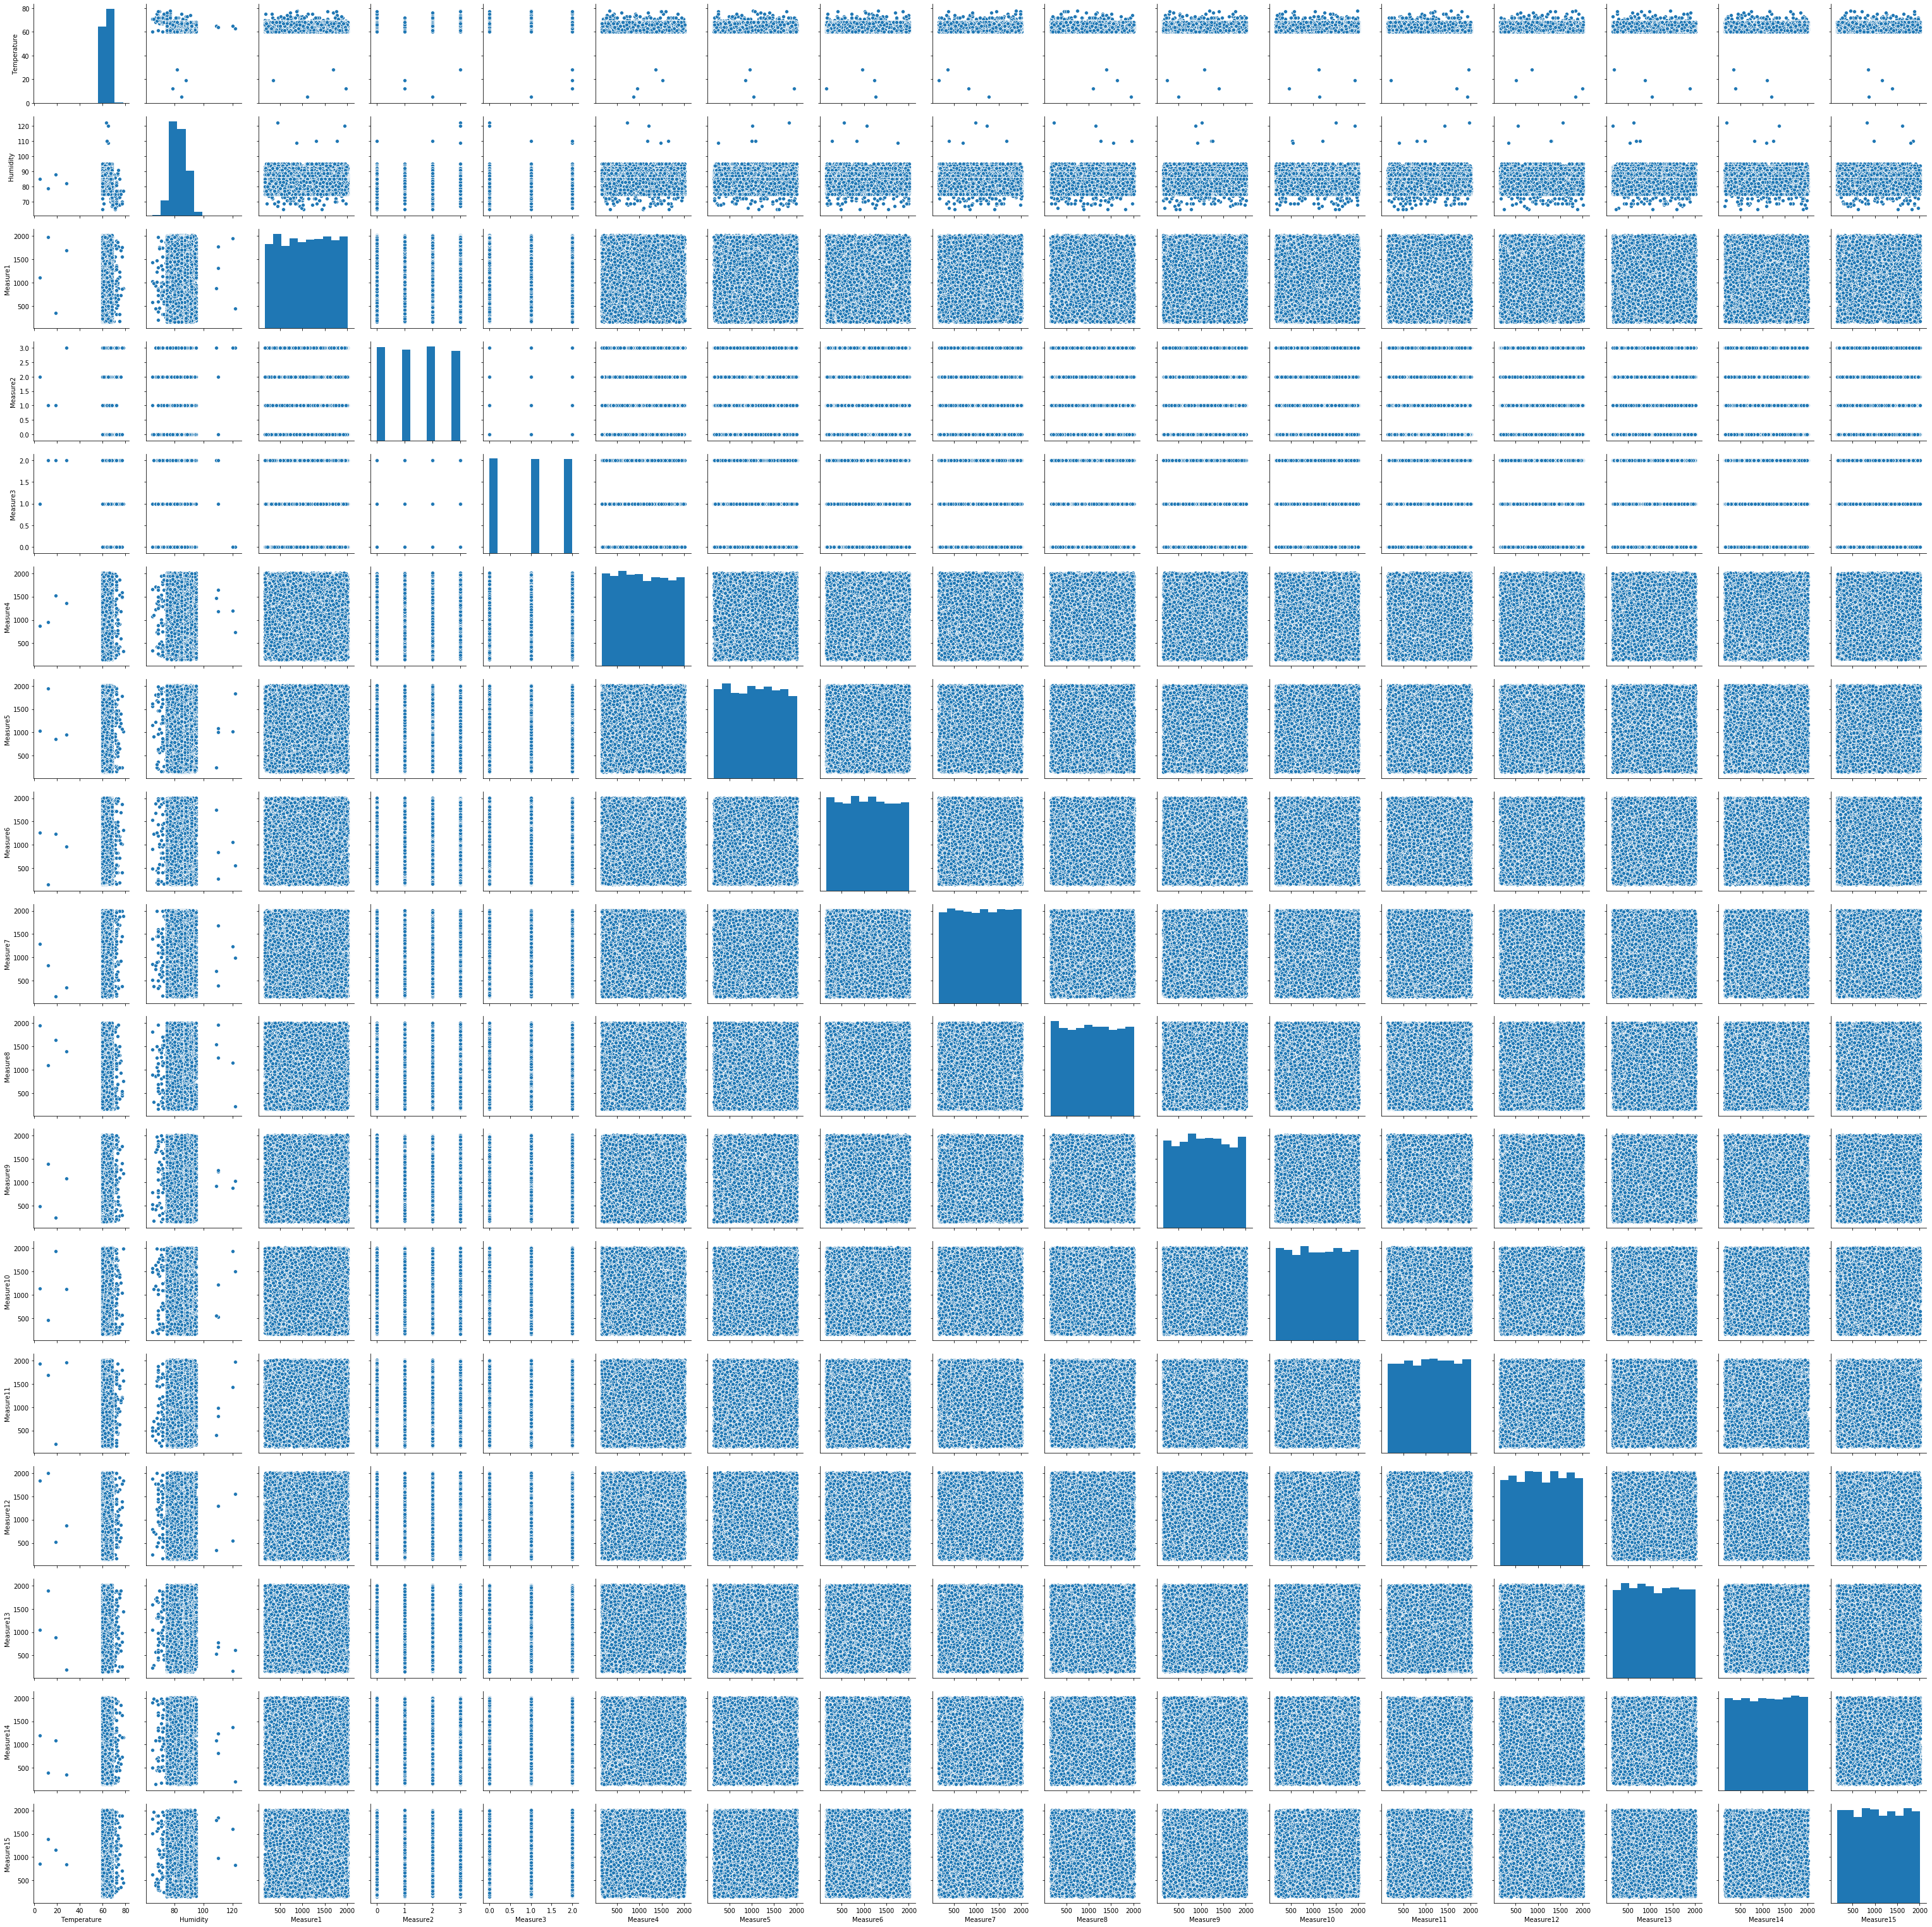

In [35]:
import seaborn as sns
sns.pairplot(ts_data)

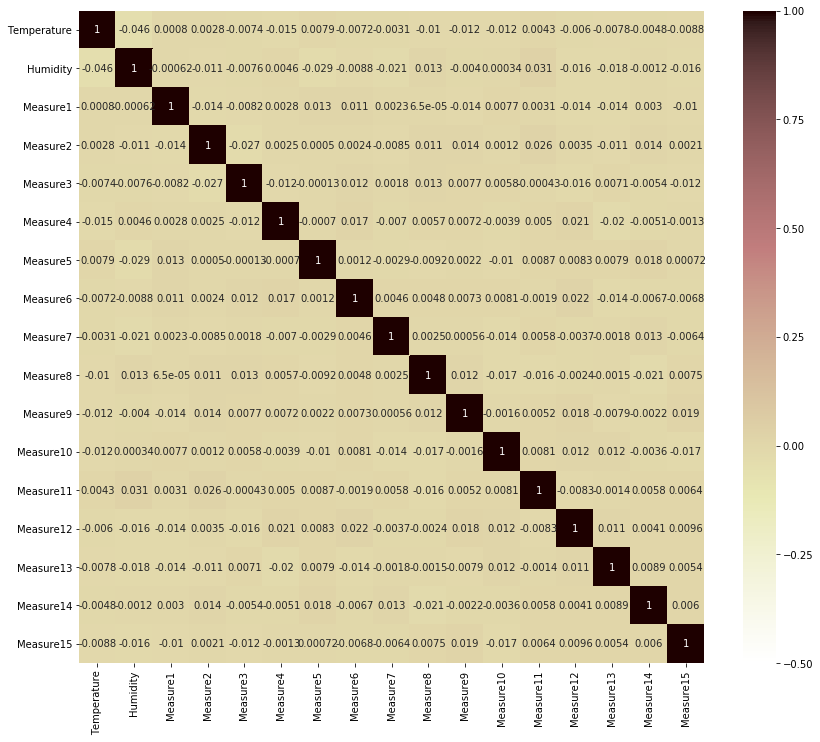

In [36]:
#awesome heatmap code with individual annotation for a multicollinearity map
correlation = ts_data.corr() 
plt.figure(figsize=(14,12)) 
heatmap = sns.heatmap(correlation, annot=True, linewidths = 0, vmin=-.5, cmap='pink_r')

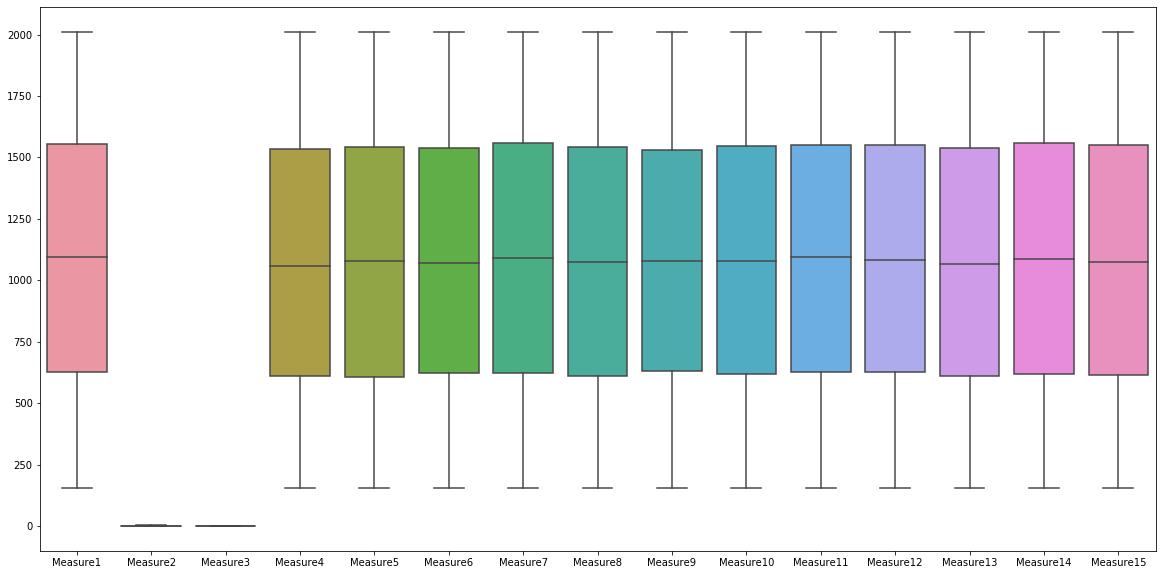

In [45]:
plt.figure(figsize=(20,10))
sns.boxplot(data=ts_data.iloc[:,3:])

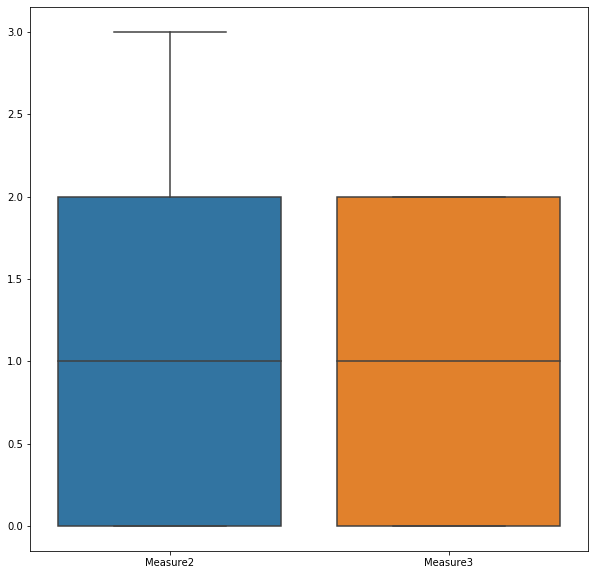

In [42]:
plt.figure(figsize=(10,10))
sns.boxplot(data=ts_data.iloc[:,4:6])